# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404080617.xlsx",sheet_name='201404080617')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,8,6:17:47,154,-8,-8,30.0,9.75,DOWN,False,...,1.49,-0.72,2.81,2.76,2.81,0.0625,机场68,机场5,0.0625,252160
1,4,8,6:17:48,154,-14,-8,30.0,10.00,DOWN,False,...,-0.19,0.37,3.14,3.15,3.14,-0.0625,机场68,机场5,-0.0625,252160
2,4,8,6:17:49,154,-16,-8,30.0,10.00,DOWN,False,...,1.90,-0.23,3.03,2.95,3.04,-0.0625,机场68,机场5,-0.0625,252160
3,4,8,6:17:50,154,-13,-8,30.0,10.25,DOWN,False,...,0.96,0.52,2.92,3.03,2.93,-0.0625,机场68,机场5,-0.0625,252160
4,4,8,6:17:51,154,-9,-8,30.0,10.50,DOWN,False,...,0.84,-0.56,3.70,3.74,3.72,-0.0625,机场68,机场5,-0.0625,252160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,4,8,9: 3:55,82,9,-8,30.0,1.50,DOWN,False,...,-2.09,-2.10,-4.68,-4.52,-4.86,-0.0625,机场68,机场5,-0.0625,232160
9966,4,8,9: 3:56,82,5,-8,30.0,1.50,DOWN,False,...,-2.85,-2.42,-4.69,-4.53,-4.86,0.0000,机场68,机场5,0.0000,232160
9967,4,8,9: 3:57,82,1,-8,30.0,1.50,DOWN,False,...,-2.71,-2.61,-4.65,-4.53,-4.81,-0.1250,机场68,机场5,-0.1250,232160
9968,4,8,9: 3:58,82,-1,-8,30.0,1.50,DOWN,False,...,-2.36,-2.20,-4.74,-4.57,-4.90,0.0000,机场68,机场5,0.0000,232160


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              9970 non-null   int64  
 1   日              9970 non-null   int64  
 2   具体时间           9970 non-null   object 
 3   海拔高度           9970 non-null   int64  
 4   下降率            9970 non-null   int64  
 5   无线电高度          9970 non-null   int64  
 6   计算空速           9970 non-null   float64
 7   地速             9970 non-null   float64
 8   起落架            1166 non-null   object 
 9   空地电门0.2秒       9970 non-null   bool   
 10  空地电门0.4秒       9970 non-null   bool   
 11  空地电门0.6秒       9970 non-null   bool   
 12  空地电门0.8秒       9970 non-null   bool   
 13  空地电门1秒         9970 non-null   bool   
 14  着陆G值0.1秒       9970 non-null   float64
 15  着陆G值0.2秒       9970 non-null   float64
 16  着陆G值0.3秒       9970 non-null   float64
 17  着陆G值0.4秒       9970 non-null   float64
 18  着陆G值0.5秒

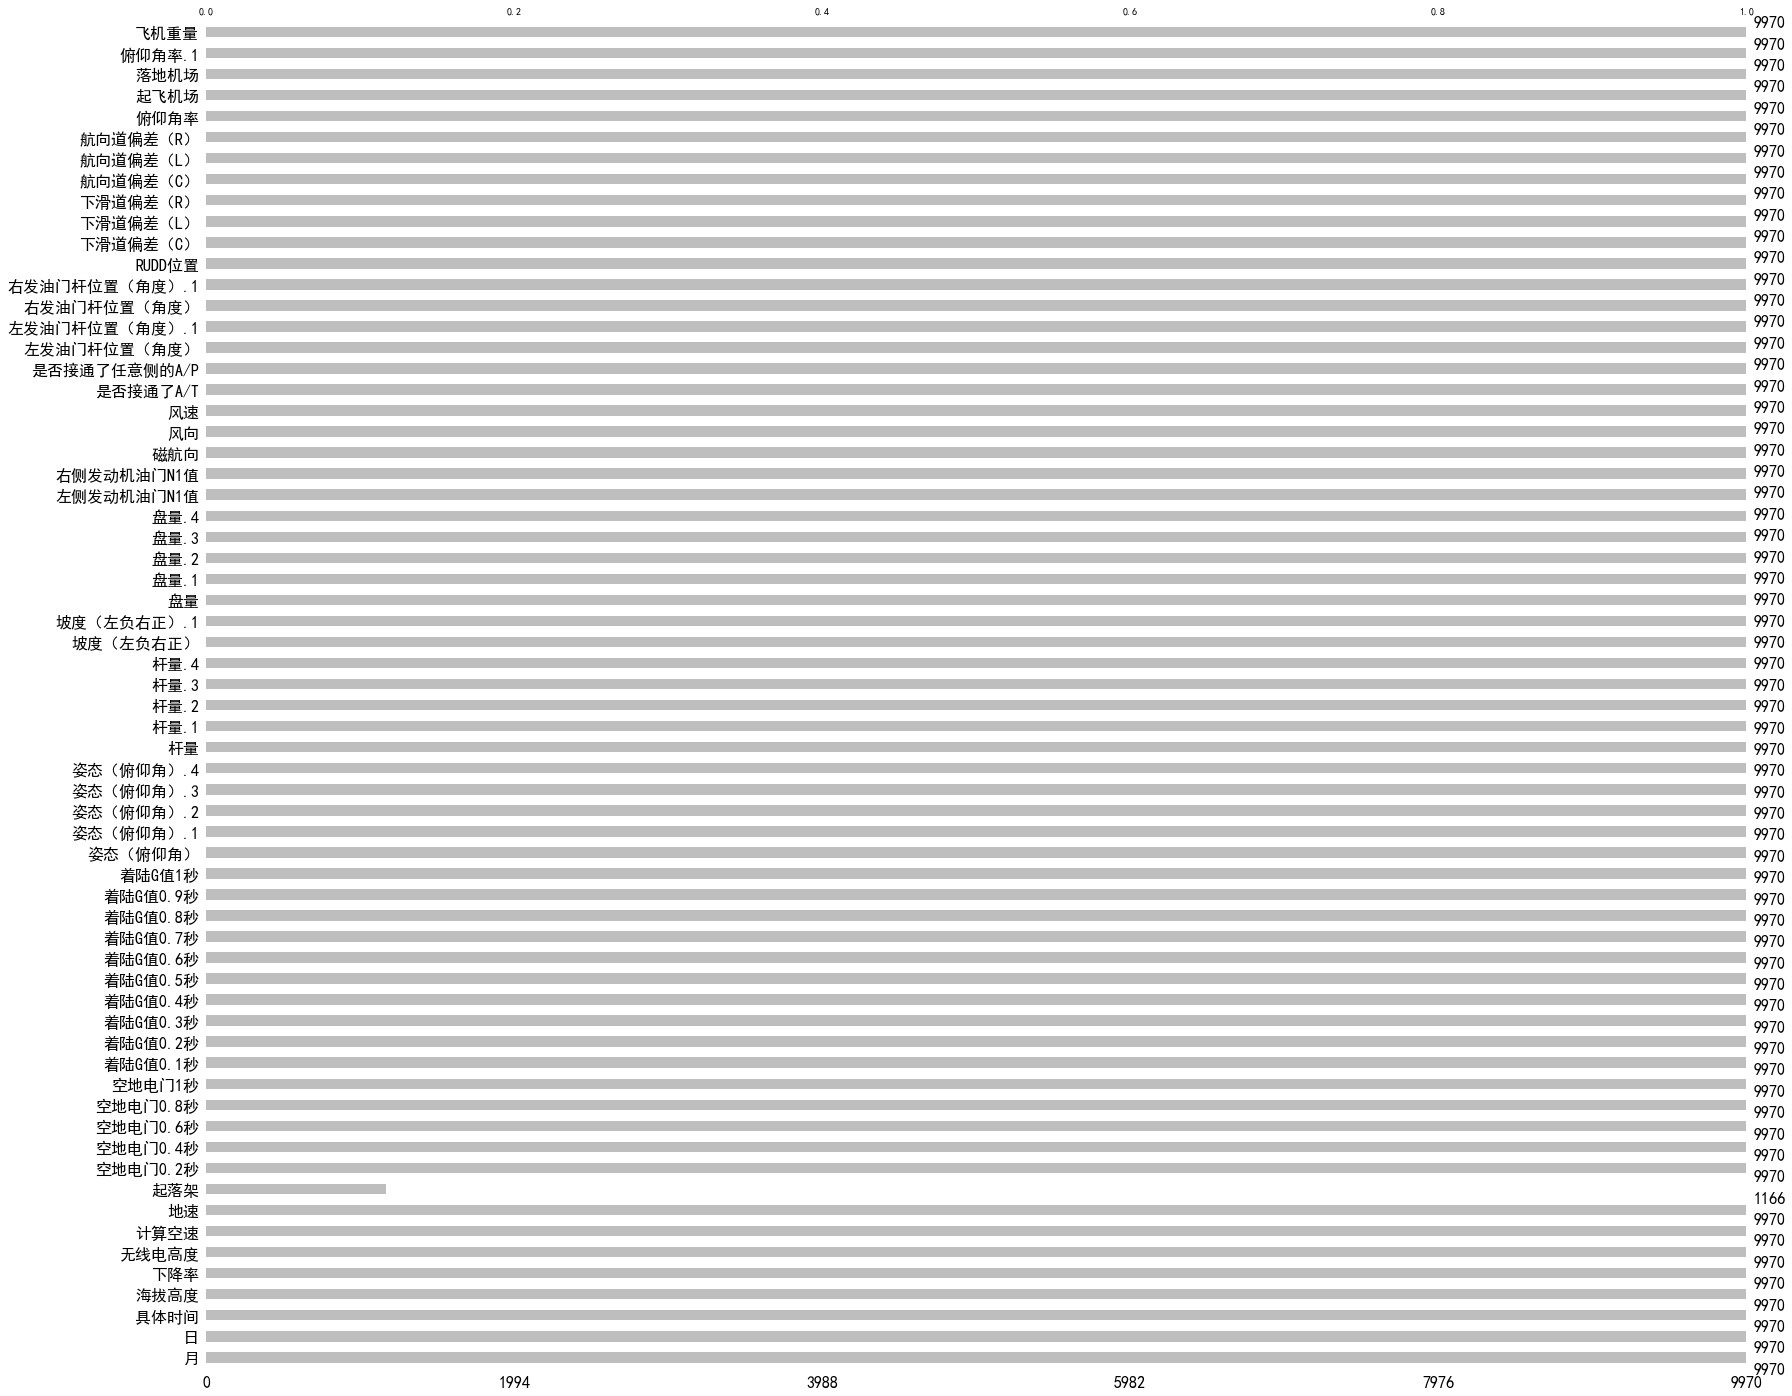

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()

In [5]:
data.replace({"起落架":{'DOWN':1},
              "空地电门0.2秒":{True:1,False:0},
              "空地电门0.4秒":{True:1,False:0},
              "空地电门0.6秒":{True:1,False:0},
              "空地电门0.8秒":{True:1,False:0},
              "空地电门1秒":{True:1,False:0},
              "是否接通了A/T":{'DISENGD':0,'ENGAGED':1},
              "是否接通了任意侧的A/P":{'OFF':0,'ON':1},
              }, inplace=True)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,8,6:17:47,154,-8,-8,30.0,9.75,1.0,0,...,1.49,-0.72,2.81,2.76,2.81,0.0625,机场68,机场5,0.0625,252160
1,4,8,6:17:48,154,-14,-8,30.0,10.00,1.0,0,...,-0.19,0.37,3.14,3.15,3.14,-0.0625,机场68,机场5,-0.0625,252160
2,4,8,6:17:49,154,-16,-8,30.0,10.00,1.0,0,...,1.90,-0.23,3.03,2.95,3.04,-0.0625,机场68,机场5,-0.0625,252160
3,4,8,6:17:50,154,-13,-8,30.0,10.25,1.0,0,...,0.96,0.52,2.92,3.03,2.93,-0.0625,机场68,机场5,-0.0625,252160
4,4,8,6:17:51,154,-9,-8,30.0,10.50,1.0,0,...,0.84,-0.56,3.70,3.74,3.72,-0.0625,机场68,机场5,-0.0625,252160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,4,8,9: 3:55,82,9,-8,30.0,1.50,1.0,0,...,-2.09,-2.10,-4.68,-4.52,-4.86,-0.0625,机场68,机场5,-0.0625,232160
9966,4,8,9: 3:56,82,5,-8,30.0,1.50,1.0,0,...,-2.85,-2.42,-4.69,-4.53,-4.86,0.0000,机场68,机场5,0.0000,232160
9967,4,8,9: 3:57,82,1,-8,30.0,1.50,1.0,0,...,-2.71,-2.61,-4.65,-4.53,-4.81,-0.1250,机场68,机场5,-0.1250,232160
9968,4,8,9: 3:58,82,-1,-8,30.0,1.50,1.0,0,...,-2.36,-2.20,-4.74,-4.57,-4.90,0.0000,机场68,机场5,0.0000,232160


In [6]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,8,6:17:47,154,-8,-8,30.0,9.75,1.0,0,...,1.49,-0.72,2.81,2.76,2.81,0.0625,机场68,机场5,0.0625,252160
1,4,8,6:17:48,154,-14,-8,30.0,10.00,1.0,0,...,-0.19,0.37,3.14,3.15,3.14,-0.0625,机场68,机场5,-0.0625,252160
2,4,8,6:17:49,154,-16,-8,30.0,10.00,1.0,0,...,1.90,-0.23,3.03,2.95,3.04,-0.0625,机场68,机场5,-0.0625,252160
3,4,8,6:17:50,154,-13,-8,30.0,10.25,1.0,0,...,0.96,0.52,2.92,3.03,2.93,-0.0625,机场68,机场5,-0.0625,252160
4,4,8,6:17:51,154,-9,-8,30.0,10.50,1.0,0,...,0.84,-0.56,3.70,3.74,3.72,-0.0625,机场68,机场5,-0.0625,252160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,4,8,9: 3:55,82,9,-8,30.0,1.50,1.0,0,...,-2.09,-2.10,-4.68,-4.52,-4.86,-0.0625,机场68,机场5,-0.0625,232160
9966,4,8,9: 3:56,82,5,-8,30.0,1.50,1.0,0,...,-2.85,-2.42,-4.69,-4.53,-4.86,0.0000,机场68,机场5,0.0000,232160
9967,4,8,9: 3:57,82,1,-8,30.0,1.50,1.0,0,...,-2.71,-2.61,-4.65,-4.53,-4.81,-0.1250,机场68,机场5,-0.1250,232160
9968,4,8,9: 3:58,82,-1,-8,30.0,1.50,1.0,0,...,-2.36,-2.20,-4.74,-4.57,-4.90,0.0000,机场68,机场5,0.0000,232160


In [7]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,6:17:47,154,-8,-8,30.0,9.75,1.0,0,0,0,...,34.0576,-0.2617,0.85,1.49,-0.72,2.81,2.76,2.81,0.0625,0.0625
1,6:17:48,154,-14,-8,30.0,10.00,1.0,0,0,0,...,34.0576,-0.2598,-0.28,-0.19,0.37,3.14,3.15,3.14,-0.0625,-0.0625
2,6:17:49,154,-16,-8,30.0,10.00,1.0,0,0,0,...,34.0576,-0.2598,1.71,1.90,-0.23,3.03,2.95,3.04,-0.0625,-0.0625
3,6:17:50,154,-13,-8,30.0,10.25,1.0,0,0,0,...,34.0576,-0.2559,0.34,0.96,0.52,2.92,3.03,2.93,-0.0625,-0.0625
4,6:17:51,154,-9,-8,30.0,10.50,1.0,0,0,0,...,34.0576,-0.2559,1.34,0.84,-0.56,3.70,3.74,3.72,-0.0625,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,9: 3:55,82,9,-8,30.0,1.50,1.0,0,0,0,...,34.1895,-0.2637,-1.92,-2.09,-2.10,-4.68,-4.52,-4.86,-0.0625,-0.0625
9966,9: 3:56,82,5,-8,30.0,1.50,1.0,0,0,0,...,34.1895,-0.2637,-2.60,-2.85,-2.42,-4.69,-4.53,-4.86,0.0000,0.0000
9967,9: 3:57,82,1,-8,30.0,1.50,1.0,0,0,0,...,34.1895,-0.2637,-2.74,-2.71,-2.61,-4.65,-4.53,-4.81,-0.1250,-0.1250
9968,9: 3:58,82,-1,-8,30.0,1.50,1.0,0,0,0,...,34.1895,-0.2637,-2.30,-2.36,-2.20,-4.74,-4.57,-4.90,0.0000,0.0000


# QAR异常判断，剔除

In [8]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
1239,True,6:38:27,14800,-3,1404,310.375,369.5,0.0,1,1,...,51.4160,-0.2441,1.75,0.82,1.44,-0.30,-0.26,-0.35,0.0000,0.0000
1240,True,6:38:27,14799,4,1404,310.250,369.5,0.0,1,1,...,51.5478,-0.2441,1.91,1.00,1.42,-0.31,-0.29,-0.37,0.0625,0.0625
4450,True,7:31:59,34103,14,1404,289.250,492.5,0.0,1,1,...,56.4697,-0.2637,-0.33,-0.04,-0.08,0.10,0.27,0.03,-0.1250,-0.1250
4451,True,7:31:59,34097,31,1404,289.750,492.5,0.0,1,1,...,56.4697,-0.2617,-0.42,-0.26,-0.17,0.09,0.22,0.22,0.0000,0.0000
7697,True,8:26: 7,34098,7,1404,289.500,492.5,0.0,1,1,...,57.7441,-0.2715,-0.16,-0.14,-0.14,-3.76,-3.67,-2.92,0.0000,0.0000
7698,True,8:26: 7,34098,9,1404,289.375,492.0,0.0,1,1,...,57.7441,-0.2715,-0.23,-0.17,-0.03,-3.59,-3.89,-3.09,0.0000,0.0000


In [9]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,6:17:47,154,-8,-8,30.0,9.75,1.0,0,0,...,34.0576,-0.2617,0.85,1.49,-0.72,2.81,2.76,2.81,0.0625,0.0625
1,False,6:17:48,154,-14,-8,30.0,10.00,1.0,0,0,...,34.0576,-0.2598,-0.28,-0.19,0.37,3.14,3.15,3.14,-0.0625,-0.0625
2,False,6:17:49,154,-16,-8,30.0,10.00,1.0,0,0,...,34.0576,-0.2598,1.71,1.90,-0.23,3.03,2.95,3.04,-0.0625,-0.0625
3,False,6:17:50,154,-13,-8,30.0,10.25,1.0,0,0,...,34.0576,-0.2559,0.34,0.96,0.52,2.92,3.03,2.93,-0.0625,-0.0625
4,False,6:17:51,154,-9,-8,30.0,10.50,1.0,0,0,...,34.0576,-0.2559,1.34,0.84,-0.56,3.70,3.74,3.72,-0.0625,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,False,9: 3:55,82,9,-8,30.0,1.50,1.0,0,0,...,34.1895,-0.2637,-1.92,-2.09,-2.10,-4.68,-4.52,-4.86,-0.0625,-0.0625
9966,False,9: 3:56,82,5,-8,30.0,1.50,1.0,0,0,...,34.1895,-0.2637,-2.60,-2.85,-2.42,-4.69,-4.53,-4.86,0.0000,0.0000
9967,False,9: 3:57,82,1,-8,30.0,1.50,1.0,0,0,...,34.1895,-0.2637,-2.74,-2.71,-2.61,-4.65,-4.53,-4.81,-0.1250,-0.1250
9968,False,9: 3:58,82,-1,-8,30.0,1.50,1.0,0,0,...,34.1895,-0.2637,-2.30,-2.36,-2.20,-4.74,-4.57,-4.90,0.0000,0.0000


In [10]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [11]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_24632\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,6:17:47,154,-8,-8,30.0,9.75,1.0,0,...,-0.2617,0.85,1.49,-0.72,2.81,2.76,2.81,0.0625,0.0625,1
1,False,False,6:17:48,154,-14,-8,30.0,10.00,1.0,0,...,-0.2598,-0.28,-0.19,0.37,3.14,3.15,3.14,-0.0625,-0.0625,1
2,False,False,6:17:49,154,-16,-8,30.0,10.00,1.0,0,...,-0.2598,1.71,1.90,-0.23,3.03,2.95,3.04,-0.0625,-0.0625,1
3,False,False,6:17:50,154,-13,-8,30.0,10.25,1.0,0,...,-0.2559,0.34,0.96,0.52,2.92,3.03,2.93,-0.0625,-0.0625,1
4,False,False,6:17:51,154,-9,-8,30.0,10.50,1.0,0,...,-0.2559,1.34,0.84,-0.56,3.70,3.74,3.72,-0.0625,-0.0625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,False,False,9: 3:55,82,9,-8,30.0,1.50,1.0,0,...,-0.2637,-1.92,-2.09,-2.10,-4.68,-4.52,-4.86,-0.0625,-0.0625,1
9966,False,False,9: 3:56,82,5,-8,30.0,1.50,1.0,0,...,-0.2637,-2.60,-2.85,-2.42,-4.69,-4.53,-4.86,0.0000,0.0000,1
9967,False,False,9: 3:57,82,1,-8,30.0,1.50,1.0,0,...,-0.2637,-2.74,-2.71,-2.61,-4.65,-4.53,-4.81,-0.1250,-0.1250,1
9968,False,False,9: 3:58,82,-1,-8,30.0,1.50,1.0,0,...,-0.2637,-2.30,-2.36,-2.20,-4.74,-4.57,-4.90,0.0000,0.0000,1


In [12]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [13]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,154,-8,-8,30.0,9.75,1.0,0,0,0,0,...,34.0576,34.0576,-0.2617,0.85,1.49,-0.72,2.81,2.76,2.81,0.0625
1,154,-14,-8,30.0,10.00,1.0,0,0,0,0,...,34.0576,34.0576,-0.2598,-0.28,-0.19,0.37,3.14,3.15,3.14,-0.0625
2,154,-16,-8,30.0,10.00,1.0,0,0,0,0,...,34.0576,34.0576,-0.2598,1.71,1.90,-0.23,3.03,2.95,3.04,-0.0625
3,154,-13,-8,30.0,10.25,1.0,0,0,0,0,...,34.0576,34.0576,-0.2559,0.34,0.96,0.52,2.92,3.03,2.93,-0.0625
4,154,-9,-8,30.0,10.50,1.0,0,0,0,0,...,34.0576,34.0576,-0.2559,1.34,0.84,-0.56,3.70,3.74,3.72,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,82,9,-8,30.0,1.50,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,-1.92,-2.09,-2.10,-4.68,-4.52,-4.86,-0.0625
9966,82,5,-8,30.0,1.50,1.0,0,0,0,0,...,34.1455,34.1895,-0.2637,-2.60,-2.85,-2.42,-4.69,-4.53,-4.86,0.0000
9967,82,1,-8,30.0,1.50,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,-2.74,-2.71,-2.61,-4.65,-4.53,-4.81,-0.1250
9968,82,-1,-8,30.0,1.50,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,-2.30,-2.36,-2.20,-4.74,-4.57,-4.90,0.0000
